# **Set Up**

In [9]:
import pandas as pd
import numpy as np

# **Read Data**

In [6]:
df = pd.read_csv("Datasets/brain_size.csv", sep=";")

In [4]:
df.shape

(40, 8)

In [5]:
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [7]:
df.isna().sum()

Unnamed: 0    0
Gender        0
FSIQ          0
VIQ           0
PIQ           0
Weight        0
Height        0
MRI_Count     0
dtype: int64

# **Read Data Again**

In [8]:
# Read Data Again To Replace Missing Values With NaN
df = pd.read_csv("Datasets/brain_size.csv", sep=";", na_values=".")
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [11]:
df.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


# **Mean**

In [10]:
df[df['Gender']=='Female']['VIQ'].mean()

109.45

In [12]:
df.groupby(by='Gender').mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [13]:
df.groupby(by='Gender').count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


# **Plotting Data**

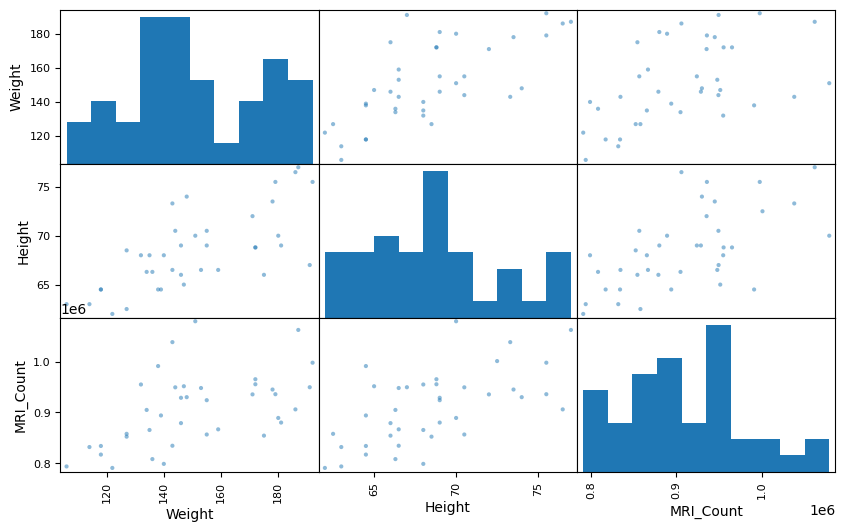

In [21]:
# from pd.plotting import plotting
%matplotlib inline

pd.plotting.scatter_matrix(df[['Weight', 'Height', 'MRI_Count']], figsize=(10, 6));

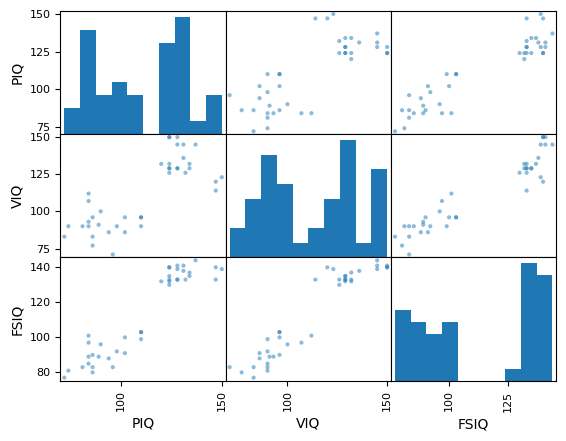

In [22]:
pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

# **Hypothesis Testing**

In [25]:
from scipy import stats

## **1 Sample**

In [26]:
stats.ttest_1samp(data["VIQ"], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.328919646872788e-28, df=39)

In [27]:
stats.ttest_1samp(data["VIQ"], 1000)

TtestResult(statistic=-237.7187533522422, pvalue=2.8655601824775706e-63, df=39)

## **2 Sample**

In [28]:
female_viq = data[data["Gender"] == "Female"]["VIQ"]
male_viq = data[data["Gender"] == "Male"]["VIQ"]
stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217)

In [29]:
female_viq.mean(), female_viq.std()

(109.45, 21.67092400818251)

In [30]:
male_viq.mean(), male_viq.std()

(115.25, 25.640993083650045)